___
### <center> <u> <h1> <strong> Calcul de la dérivée d'une fonction par Transformée de Fourier </strong> </h1> </center>

<h3>
<ul>
<li> Dans ce notebook  nous verrons comment évaluer la dérivée d'une fonction par la méthode de transformée de Fourier  </li>    
<li> L'utilisation de la méthode suppose au préalable que la fonction est discrétisée/échantillonée </li>
    </ul>
    </h3>
    
---

<h1> <strong> A - Importatiion des modules necessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1> <strong> B - Classe python qui gère les dérivées

<h2>
    La classe suivante dispose d'une méthode qui permet d'évaluer la dérivée d'une fonction donnée en utilisant la transformée de Fourier. Elle contient aussi <a href="https://github.com/Brice-KENGNI-ZANGUIM/Methodes-de-d-rivation-des-fonctions/blob/main/Diff%C3%A9rence_finie/Difference_finie.ipynb"> d'autres methodes qui évaluent cette même dérivée par la méthodes des différences finies </a>

In [2]:
class DeriveDeFonctions(  ) :
    """
    DESCRIPTION : 
    ------------
        Objet Python qui contient des méthodes permettant de calculer les dérivées d'une fonction donnée

    AUTHOR : 
    --------
        BRICE KENGNI ZANGUIM
        kenzabri2@yahoo.com

    """
    def __init__ ( self , function , h ) :
        """
        DESCRIPTION : 
        ------------
            Constructeur de la classe qui defini et construit les variables pertinentes de l'objet
        
        PARAMETRES : 
        -----------
            - function : list, np.array
                function dont la dérivée doit être évaluée
            
            - h : float
                Représente le pas d'intégration de la fonction
                    
        OUTPUT :  None
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        self.function = np.array(function)
        self.h = h
        
    def derivee_avant_a_1_point( self, f =None , h = None  ) :
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard d'un point suivant
                    
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[1:] - self.function[:-1] )/self.h
        a = list(a)
        a.insert( len(a), 2*a[-1]-a[-2])
        return  np.array(a)
    
    def derivee_arrière_a_1_point( self, f =None , h = None ) :
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard d'un point précédant
        
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[1:] - self.function[:-1] )/self.h
        a = list(a)
        a.insert(0, 2*a[0]-a[1] )
        return  np.array(a)
    
    def derivee_centrale_a_1_point( self, f =None, h = None ): 
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard des deux points l'entourant
        
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[2:] - self.function[:-2] )/(2*self.h)
        a = list(a)
        a.insert(0,2*a[0]-a[1] )
        a.insert(len(a), 2*a[-1]-a[-2])
        return  np.array(a)
    
    def derivee_par_Fourier_Transform ( self, f , h , duration = None ) :
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction en utilisant la transformée de Fourier
        
        PARAMETRES :
        ------------
            - f : array
                fonction à utiliser
            - h : float
                plus petite distance spatiale ou temporelle séparant deux valeurs consécutive de la fonction f
        
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        self.function = f
        self.h = h
        
        if duration is not None: 
            n = duration/self.h 
        else :
            n = len(self.function) -1
            duration = n*self.h
        
        
        
        #########################################################################
        #########       Longueurs d'onde ou frequence spatiale        ###########
        #########################################################################
        kappa = 2*np.pi/duration*np.arange( -n/2. , n/2. )
        kappa = np.fft.fftshift(kappa)
        
        #########################################################################
        #########         Fréquences centrale translatée en 0         ###########
        #########################################################################
        f_hat = np.fft.fft( self.function )  
        
        #########################################################################
        #########      Transformée de Fourier de la dérivée de f      ###########
        #########################################################################
        FT_dif_f = (1j)*kappa*f_hat
        
        return np.real(np.fft.ifft(  FT_dif_f )) 
    
    def erreur( self, df_vraie , df_approx ) :
        """
        DESCRIPTION : 
        ------------
            Calcul l'errreur faite lors du calcul d'une dérivée approximative
        
        OUTPUT :  float
        ------- 
            retourne la valeur de l'erreur
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return np.sqrt( np.mean((np.array(df_vraie) - np.array(df_approx))**2) )

<h1> <strong> C - évaluation des fonctions et représentation graphique

<h2>
    La fonction suivante ainsis que sa dérivée première seront utilisées pour évaluer cette dérivée par transformée de Fourier et comparer l'erreur obtenue avec celle obtenue sur les méthodes de calculs par différence finies

In [3]:
a = -0.7
mu = 6
def f_function(t) :
    return np.sin(2*np.pi*mu*t)*np.exp(a*t) 


def df_function( t ) :
    return ( 2*np.pi*mu*np.cos(2*np.pi*mu*t) + a*np.sin(2*np.pi*mu*t)  )*np.exp(a*t)

In [4]:
L = 4
n = 1000
dt = L/n

t = np.arange( -L/2 , L/2 , dt )


<h2>
    
    La fonction est définie comme

In [5]:
f = f_function( t )

<h2>
    
    Sa dérivée première analytique est 

In [6]:
df = df_function( t )

<h2>
    
    Les deux fonction se présentent comme suit graphiquement :

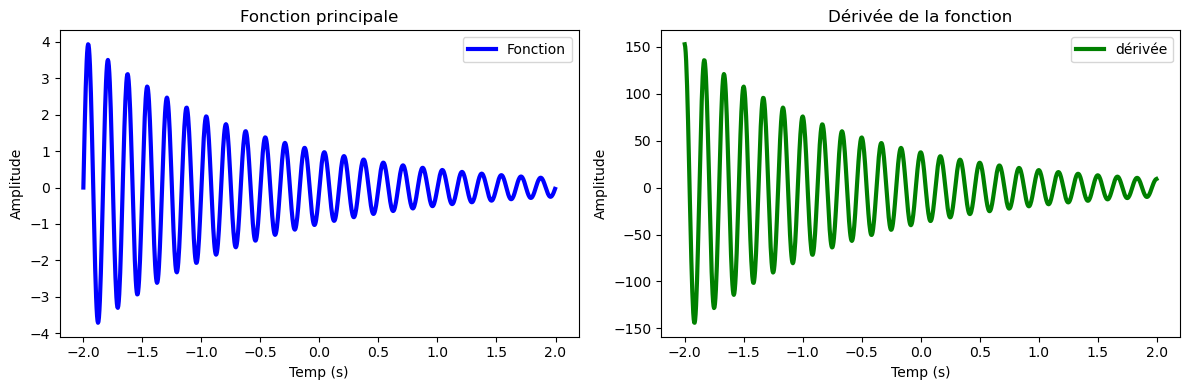

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))

ax[0].plot(t , f, color = 'blue', lw = 3 , label = "Fonction")
ax[0].set_xlabel("Temp (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend(loc='best')
ax[0].title.set_text("Fonction principale")

ax[1].plot(t , df, color = 'green', lw  = 3, label = "dérivée")
ax[1].set_xlabel("Temp (s)",)
ax[1].set_ylabel("Amplitude",)
ax[1].legend(loc='best')
ax[1].title.set_text("Dérivée de la fonction")

plt.tight_layout()
plt.show()

<h1> <strong> C - Dérivée de la fonction par transformée de Fourier

<h2>
    
    L'objet suivant nous permettra d'évaluer la dérivée par transformée de Fourier

In [8]:
derive_object = DeriveDeFonctions( f , dt )

<h2>
    
    Evaluons à présent les dérivées

In [9]:
df_fourier = derive_object.derivee_par_Fourier_Transform( f , dt , L )

<h1> <strong> E - Représentation graphique des dérivées

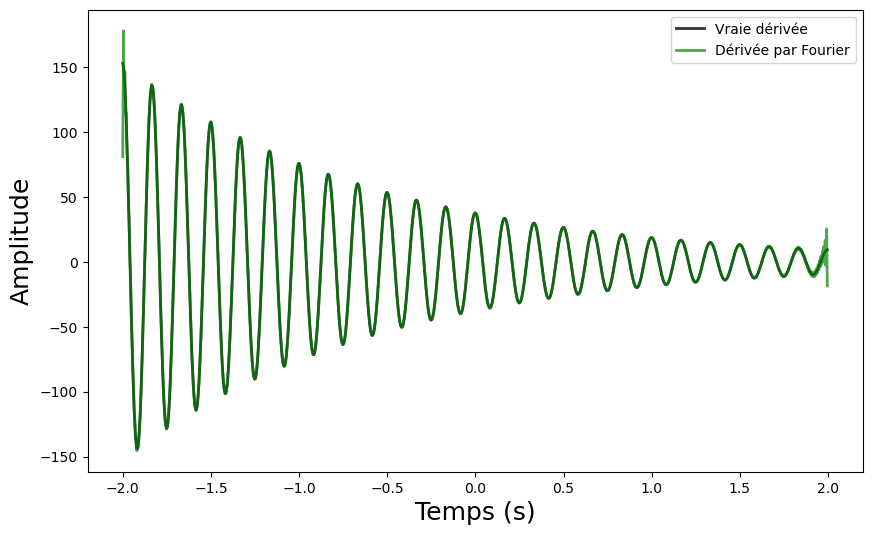

In [10]:
plt.figure(figsize = (10,6))

plt.plot(t , df , lw = 2 ,alpha = .8, color = "black" , label="Vraie dérivée")
plt.plot(t , df_fourier , lw = 2 ,alpha = 0.7, color = "green" , label="Dérivée par Fourier")


plt.xlabel( "Temps (s)", size = 18)
plt.ylabel( "Amplitude", size = 18 )

#plt.ylim(-20,20)
plt.legend(loc = 'best')
plt.show()

<h2>
    
    L'erreur éffectuée en approximant la vraie dérivée à l'une de ces dérivée finie est

In [11]:
derive_object.erreur(df , df_fourier)

2.865198324823262

<h1> <strong> F - Variation de l'erreur avec la taille d'échantillonage

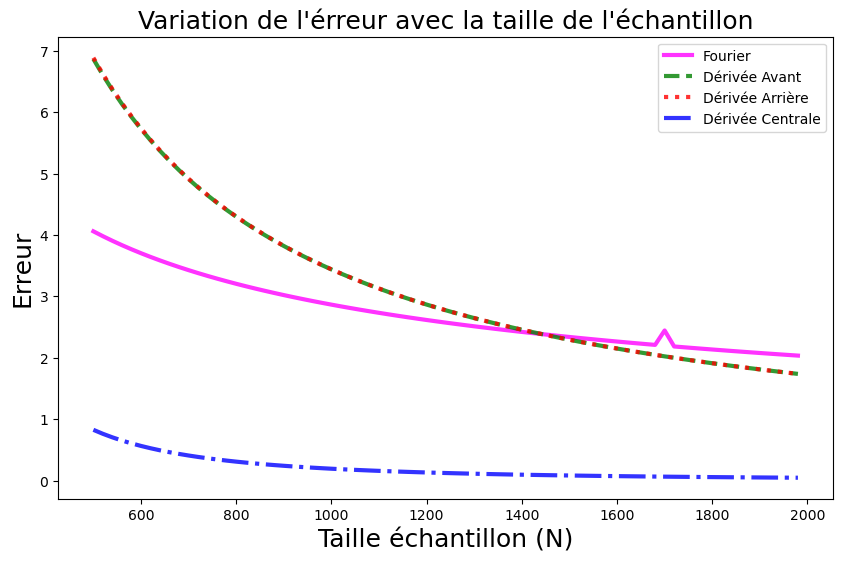

In [12]:
erreur = {"arrière" :[],
          "avant" : [],
          "centre" : [],
          "fourier" : []
        }

N = range(500 , 2000 , 20 )

for der in ["centre", "avant", "arrière", "fourier"] :
    for n in N :
        
        dt = L/n
        t = np.arange( -L/2 , L/2 , dt )
        
        if der == "centre" :
            df_approx = derive_object.derivee_centrale_a_1_point( f_function(t) , dt )
        elif der == "avant" :
            df_approx = derive_object.derivee_avant_a_1_point( f_function(t) , dt )
        elif der == "arrière" :
            df_approx = derive_object.derivee_arrière_a_1_point( f_function(t) , dt )
        elif der == "fourier" :
            df_approx = derive_object.derivee_par_Fourier_Transform( f_function(t) , dt, L )
            
        erreur[der].append( derive_object.erreur( df_function(t) , df_approx) )

plt.figure(figsize = (10,6))

plt.plot(N , erreur["fourier"] , lw = 3 ,alpha = 0.8, color = "magenta" , ls='solid', label="Fourier")
plt.plot(N , erreur["avant"] , lw = 3 ,alpha = 0.8, color = "green" , ls='dashed', label="Dérivée Avant")
plt.plot(N , erreur["arrière"] , lw = 3 ,alpha = 0.8, color = "red" , ls='dotted', label="Dérivée Arrière")
plt.plot(N , erreur["centre"] , lw = 3 ,alpha = 0.8, color = "blue" , ls='dashdot', label="Dérivée Centrale")

plt.xlabel( "Taille échantillon (N)", size = 18)
plt.ylabel( "Erreur", size = 18 )

plt.title( "Variation de l'érreur avec la taille de l'échantillon" , size =18 )
plt.legend(loc ="best")
plt.show()

- ## <strong> Discussion  </strong>

<h3>
<ol>
    <li> La première remarque qui s'impose est au sujet de des oscillations parasites qui naissent sur les bords du domaine de definition de la fonction </li>
    <li> Cette oscillation parasite s'explique par une hypothèse clé de la Transformée de Fourier : <strong> L'utilisation de la transformée de Fourier suppose au départ que la fonction en elle même soit continue mais aussi périodique; ce qui n'est pas le cas de la fonction utilisée ici. </strong> </li>
    <li> En réponse à celà, la transformée de Fourier va tenter de s'adapter aux jeux de données qui lui sont proposés en éssayant de générer une fonction qui satisfait ces deux conditions: continuité et périodicité. En conséquences de celà on observe ces oscillations sur les bords/frontières qui tentent de forcer la génération d'une fonction parfaitement continue et périodique. </li>
    <li> Une façon de résoudre ce problème est <strong>d'utiliser une fonction qui s'évanoui sur ses bords,</strong> c'est à dire une fonction qui tends progressivement ou rapidement vers une valeur nulle à mésure qu'on se rapproche des bordures de la fonction. </li>
    <li> Avec ce type de fonction on est assuréqu'en éffectuant des copies parfaitement de la fonction dans son domaine de definition et en les raccollant/justaposant de manière à obtenir une fonction périodique, on obtiendra aussi en même temps une fonction qui continue.  </li>
    <li> Elle sera d'autant plus continue si elle se rapproche encore plus de la valeur nulle sur ses bords </li>
    <li>  On peut tester cette hypothèse en utilisant une autre fonction qui satisfait cette condition : <strong> Utilisons pour celà cette fois ci une telle fonction </strong>  </li>

</ol>
</h3>

<h1> <strong> F - Fonction sinus cardinal

In [52]:
a = -5.5
mu = 4
def f_function(t) :
    return np.sin(2*np.pi*mu*t)*np.exp(a*t**2) 


def df_function( t ) :
    return ( 2*np.pi*mu*np.cos(2*np.pi*mu*t) + a*np.sin(2*np.pi*mu*t)  )*np.exp(a*t**2)

In [53]:
L = 4
n = 1000

t = np.linspace( -L/2 , L/2 , n )
dt = t[1] - t[0]

<h2>
    
    La fonction est définie comme

In [44]:
f = f_function( t )

<h2>
    
    Sa dérivée première analytique est 

In [45]:
df = df_function( t )

<h2>
    
    Les deux fonction se présentent comme suit graphiquement :

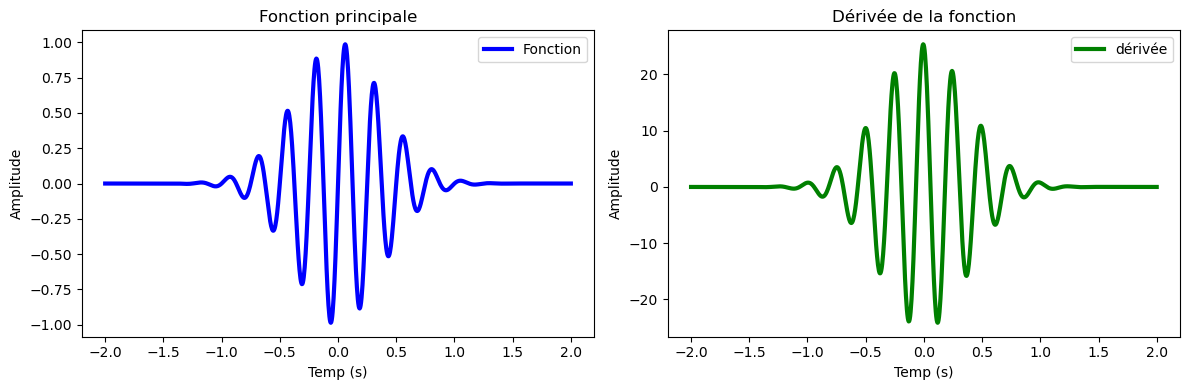

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))

ax[0].plot(t , f, color = 'blue', lw = 3 , label = "Fonction")
ax[0].set_xlabel("Temp (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend(loc='best')
ax[0].title.set_text("Fonction principale")

ax[1].plot(t , df, color = 'green', lw  = 3, label = "dérivée")
ax[1].set_xlabel("Temp (s)",)
ax[1].set_ylabel("Amplitude",)
ax[1].legend(loc='best')
ax[1].title.set_text("Dérivée de la fonction")

plt.tight_layout()
plt.show()

<h2>
    
    L'objet pour évaluer la dérivée

In [47]:
derive_object = DeriveDeFonctions( f , dt )

<h2>
    
    Evaluons à présent les dérivées

In [48]:
df_fourier = derive_object.derivee_par_Fourier_Transform( f , dt, L )

<h1> <strong> E - Représentation graphique des dérivées

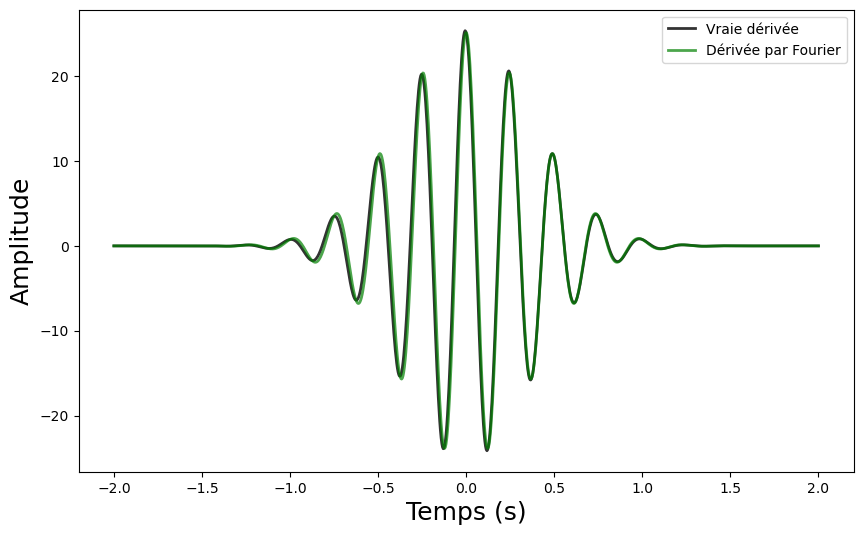

In [49]:
plt.figure(figsize = (10,6))

plt.plot(t , df , lw = 2 ,alpha = .8, color = "black" , label="Vraie dérivée")
plt.plot(t , df_fourier , lw = 2 ,alpha = 0.7, color = "green" , label="Dérivée par Fourier")


plt.xlabel( "Temps (s)", size = 18)
plt.ylabel( "Amplitude", size = 18 )

#plt.ylim(-20,20)
plt.legend(loc = 'best')
plt.show()

<h2>
    
    L'erreur éffectuée en approximant la vraie dérivée à l'une de ces dérivée finie est

In [50]:
derive_object.erreur(df , df_fourier)

1.1481439541804417

<h1> <strong> F - Variation de l'erreur avec la taille d'échantillonage

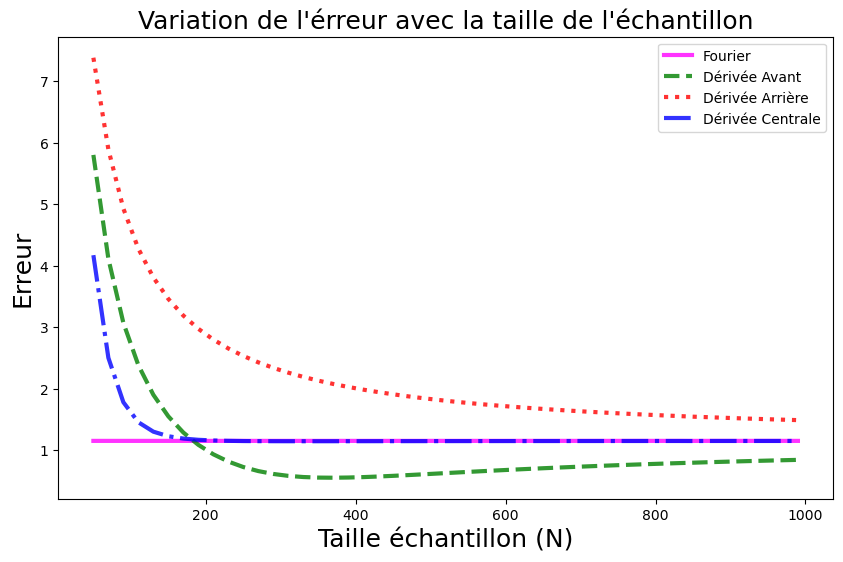

In [51]:
erreur = {"arrière" :[],
          "avant" : [],
          "centre" : [],
          "fourier" : []
        }

N = range( 50 , 1000 , 20 )

for der in ["centre", "avant", "arrière", "fourier"] :
    for n in N :
        
        dt = L/n
        t = np.arange( -L/2 , L/2 , dt )
        
        if der == "centre" :
            df_approx = derive_object.derivee_centrale_a_1_point( f_function(t) , dt )
        elif der == "avant" :
            df_approx = derive_object.derivee_avant_a_1_point( f_function(t) , dt )
        elif der == "arrière" :
            df_approx = derive_object.derivee_arrière_a_1_point( f_function(t) , dt )
        elif der == "fourier" :
            df_approx = derive_object.derivee_par_Fourier_Transform( f_function(t) , dt, L )
            
        erreur[der].append( derive_object.erreur( df_function(t) , df_approx) )

plt.figure(figsize = (10,6))

plt.plot(N , erreur["fourier"] , lw = 3 ,alpha = 0.8, color = "magenta" , ls='solid', label="Fourier")
plt.plot(N , erreur["avant"] , lw = 3 ,alpha = 0.8, color = "green" , ls='dashed', label="Dérivée Avant")
plt.plot(N , erreur["arrière"] , lw = 3 ,alpha = 0.8, color = "red" , ls='dotted', label="Dérivée Arrière")
plt.plot(N , erreur["centre"] , lw = 3 ,alpha = 0.8, color = "blue" , ls='dashdot', label="Dérivée Centrale")

plt.xlabel( "Taille échantillon (N)", size = 18)
plt.ylabel( "Erreur", size = 18 )

plt.title( "Variation de l'érreur avec la taille de l'échantillon" , size =18 )
plt.legend(loc ="best")
plt.show()

---

- ## <strong> Authors </strong>

 #### <ul> <p> - <strong><a href="https://www.linkedin.com/in/brice-kengni-zanguim/" target="_blank">Brice KENGNI ZANGUIM :</a> </strong></p> <ul> Artificial Intelligence Engeneer at home and holds a PhD in Nano-physic. His research focused on using <strong>Machine Learning, Deep Learning, Signal Processing, Natural langage Processing, Computer Vision and so one</strong> to figure out how the world behave and impact human cognition. Brice KENGNI ZANGUIM has been working at home on mastering his own AI projects in many domains while seeking for a position in a company. </ul></ul>


---

- ## <strong> Other Contributors </strong>

#### <ul>None</ul>

---

- ## <strong> Change Log </strong>

|  Date (DD-MM-YYYY) |  Version | Changed By  |  Change Description |  Purpose  |
|---|---|---|---|---|
| 13- 03 - 2023 | 2.0 | Brice KENGNI ZANGUIM | Final update | Mem,save |
|-|-|-|-|
|   |   |   |   |   |

### <h3 align="center"> © BKZ Corporation 2023. All rights reserved. <h3/>
---